<a href="https://colab.research.google.com/github/melissajblins/jogo-da-forca/blob/main/Jogo_da_Forca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linguagens Formais e Autômatos [2024.Q1] - Jogo da Forca

*   Professor Alexandre Donizeti Alves
*   Aluno 1: Melissa Junqueira de Barros Lins, 11201920583
- Referências:
  - https://ijic.utm.my/index.php/ijic/article/view/275
  - https://github.com/Fikretatr/Cse422Project/blob/main/hangman.jl
  - https://www.youtube.com/watch?v=EpdCHX96lkY

- Autômato modelo:
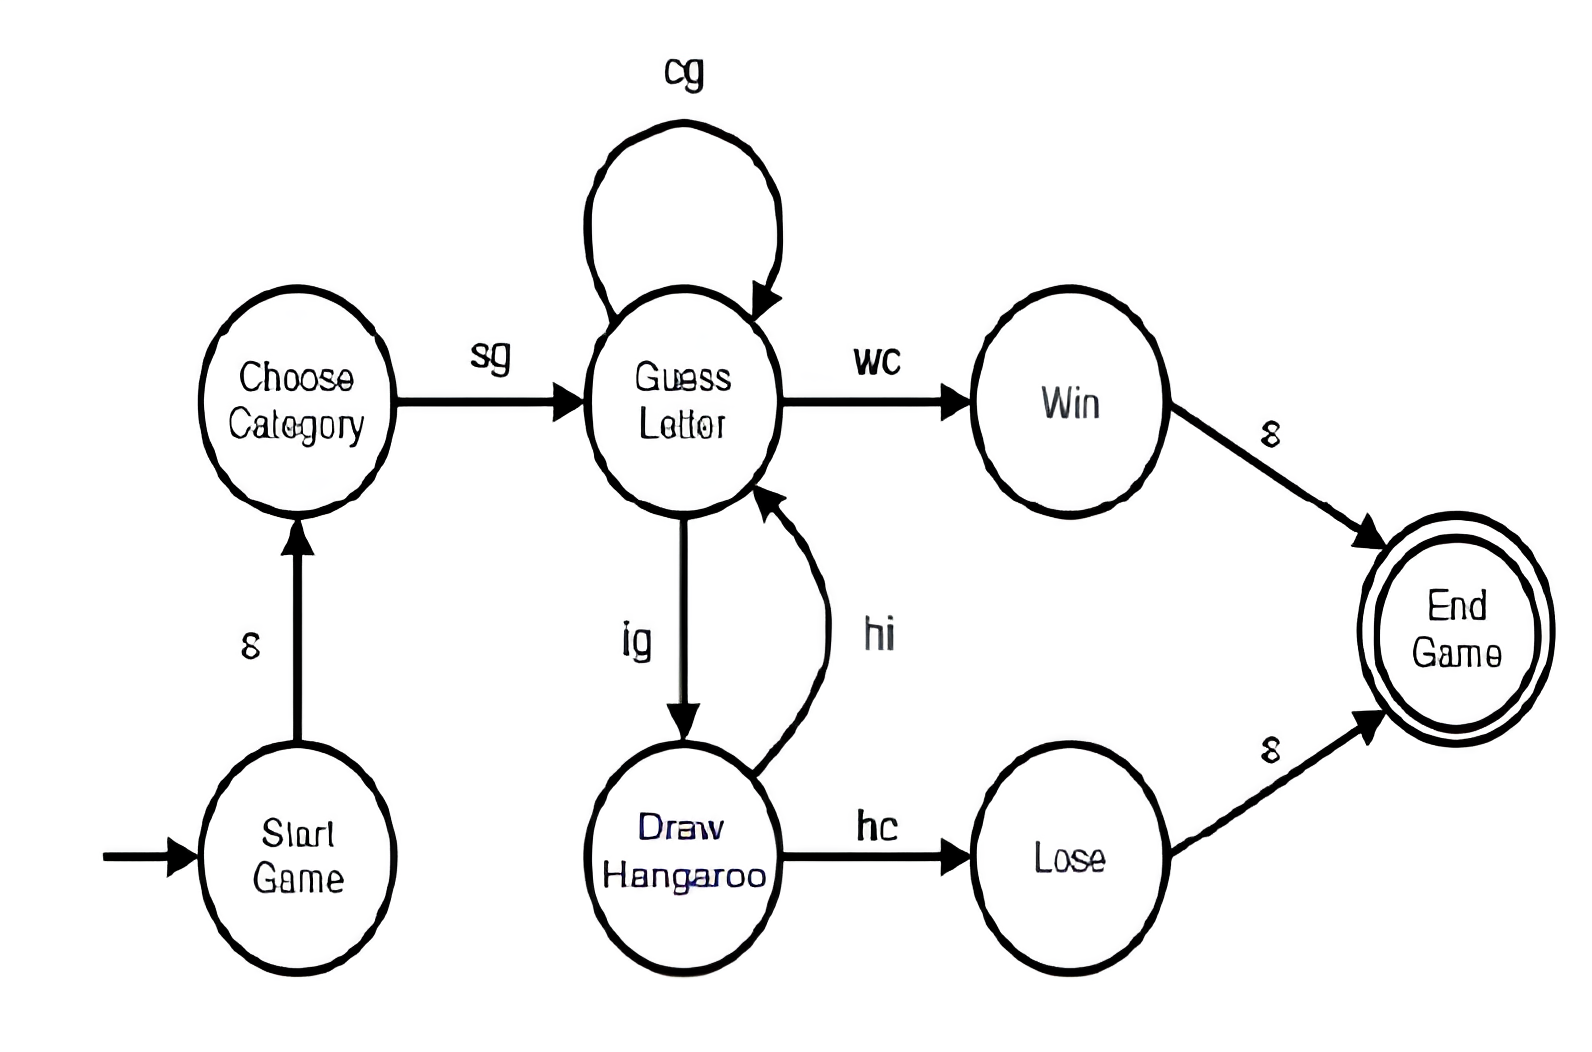



## Bibliotecas

In [93]:
import random

## Categorias e Palavras

In [94]:
Animals = ["ant", "bear", "cat", "dog", "elephant", "frog", "giraffe", "horse", "iguana", "jaguar", "kangaroo", "lion", "monkey", "newt", "owl", "penguin", "quokka", "rabbit", "snake", "tiger", "unicorn", "vulture", "whale", "xerus", "yak", "zebra"]
Fruits = ["Apples", "Apricots", "Avocados","Cherries","Elderberry", "Eggfruit","Kiwi","Olive", "Oranges","Papaya","Peach", "Pomegranate", "Pineapple","Tomato", "Tangerine","Zucchini"]
Brands = ["Nike","Amazon","Apple","Netflix","Google","Spotify","Nintendo","Microsoft","Instagram","Tesla","Linkedin","Playstation","Starbucks","Honda","Mercedes","Adobe","Logitech","Adidas"]

## Código

In [95]:
def inicio():
      print("""
          ++++++++++     Jogo da Forca     ++++++++++
        """)

In [96]:
def vidas6():
  print("""
            +------------------------------+
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            ___|___
            """)

In [97]:
def vidas5():
  print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            ___|___
            """)

In [98]:
def vidas4():
   print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |                              |
            |
            |
            |
            |
            ___|___
            """)

In [99]:
def vidas3():
              print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |                              |
            |                             /|
            |                            / |
            |                           /  |
            |                          /   |
            |                              |
            |                              |
            |                              |
            |                              |
            |
            |
            |
            |
            ___|___
            """)

In [100]:
def vidas2():
              print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |                              |
            |                             /|\\
            |                            / | \\
            |                           /  |  \\
            |                          /   |   \\
            |                              |
            |                              |
            |                              |
            |                              |
            |
            |
            |
            |
            ___|___
            """)

In [101]:
def vidas1():
              print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | -   - |
            |                          |   .   |
            |                          |  (~)  |
            |                          ---------
            |                              |
            |                             /|\\
            |                            / | \\
            |                           /  |  \\
            |                          /   |   \\
            |                             /
            |                            /
            |                           /
            |                          /
            |
            |
            |
            |
            ___|___
            """)

In [102]:
def ganhou():
          print("""
            +------------------------------+
            |
            |
            |                         /-\\
            |                        /   \\
            |                       /     \\
            |                      ---------
            |           ---------
            |      _    | ^   ^ |    _
            |      |    |   .   |    |
            |      \    | [___] |    /
            |       \   ---------   /
            |        \      |      /
            |         \-----|-----/
            |               |
            |               |
            |               |
            |              / \\
            |             /   \\
            |            /     \\
            |           /       \\
            ___|___     /         \\    __
        """)

In [103]:
def perdeu():
          print("""
            +------------------------------+
            |
            |
            |                          ---------
            |                          | x   x |
            |                          |   .   |
            |                          |   O   |
            |                          ---------
            |                       -------|-------
            |                             /|\\
            |                            / | \\
            |                           /  |  \\
            |                          /   |   \\
            |                             / \\
            |                            /   \\
            |                           /     \\
            |                          /       \\
            |                         /         \\
            |
            |
            |
            |
            ___|___
        """)

In [104]:
import random
import string

letter = ""

animals = ["ant", "bear", "cat", "dog", "elephant", "frog", "giraffe", "horse", "iguana", "jaguar", "kangaroo", "lion", "monkey", "newt", "owl", "penguin", "quokka", "rabbit", "snake", "tiger", "unicorn", "vulture", "whale", "xerus", "yak", "zebra"]
fruits = ["apples", "apricots", "avocados", "cherries", "elderberry", "eggfruit", "kiwi", "olive", "oranges", "papaya", "peach", "pomegranate", "pineapple", "tomato", "tangerine", "zucchini"]
brands = ["nike", "amazon", "apple", "netflix", "google", "spotify", "nintendo", "microsoft", "instagram", "tesla", "linkedin", "playstation", "starbucks", "honda", "mercedes", "adobe", "logitech", "adidas"]

categories = {
    "animals": animals,
    "fruits": fruits,
    "brands": brands
}

def load_wordlist(words):
    return words

def create_hangman_automaton():
    alphabet = list(string.ascii_lowercase)
    transitions = {
        ('q0', ''): 'q1',
        ('q1', 'false'): 'q1',
        ('q1', 'true'): 'q2',
    }
    for letter in alphabet:
      transitions[('q2', letter)] = 'q3'
    transitions.update({
        ('q3', 'word_complete'): 'q4',
        ('q3', 'word_incomplete'): 'q2',
        ('q3', 'error'): 'q5',
        ('q4', ''): 'q6',
        ('q5', ''): 'q6'
    })

    automaton = {
        "alphabet": alphabet,
        "states": ["q0", "q1", "q2", "q3", "q4", "q5", "q6"],
        "initial_state": "q0",
        "accepting_states": ["q6"],
        "transitions": transitions
    }
    return automaton

def play_hangman():
    errors = 0
    guessed_letters = set()

    automaton = create_hangman_automaton()
    current_state = automaton['initial_state']
    word = ""
    category_name = ""
    error = False

    current_state = automaton['transitions'][current_state, '']

    while current_state == "q1":
      category_name = input("Choose a category (Animals, Fruits, Brands): ").strip().capitalize().lower()
      if category_name not in categories:
        current_state = automaton['transitions'][current_state, 'false']
      else:
        current_state = automaton['transitions'][current_state, 'true']

    wordlist = load_wordlist(categories[category_name])
    word = random.choice(wordlist)

    inicio()
    vidas6()

    while current_state not in automaton['accepting_states'] and error != True:
      print("Current state:", current_state)
      print("Word:", ''.join(letter if letter in guessed_letters else ' _ ' for letter in word))

      letter = input("Guess a letter: ").lower()
      if len(letter) != 1 or not letter.isalpha():
        print("Invalid input! Please guess a single letter.")
      elif (letter in guessed_letters):
        print("You already guessed that letter!")
      else:
        guessed_letters.add(letter)

      current_state = automaton['transitions'][current_state, letter]

      if current_state == 'q3':
        if letter in word:
          if all(letter in guessed_letters for letter in word):
              current_state = automaton['transitions'][current_state, 'word_complete']
          else:
              current_state = automaton['transitions'][current_state, 'word_incomplete']
        else:
          errors += 1
          print(errors)
          if (errors) == 1:
            vidas5()
          elif (errors) == 2:
            vidas4()
          elif (errors) == 3:
            vidas3()
          elif (errors) == 4:
            vidas2()
          elif (errors) == 5:
            vidas1()
          if (errors == 6):
            error = True
            current_state = automaton['transitions'][current_state, 'error']
          else:
            current_state = automaton['transitions'][current_state, 'word_incomplete']


      if current_state == 'q4':
        print("Você venceu!")
        print("A palavra é: " + word)
        ganhou()
        current_state = automaton['transitions'][current_state, '']
      if current_state == 'q5':
        print("Você perdeu!")
        print("A palavra era: " + word)
        perdeu()
        current_state = automaton['transitions'][current_state, '']

if __name__ == "__main__":
    play_hangman()

Choose a category (Animals, Fruits, Brands): Cars
Choose a category (Animals, Fruits, Brands): Brands

          ++++++++++     Jogo da Forca     ++++++++++
        

            +------------------------------+
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            |
            ___|___
            
Current state: q2
Word:  _  _  _  _  _  _ 
Guess a letter: a
Current state: q2
Word: a _  _  _ a _ 
Guess a letter: m
1

            +------------------------------+
            |
            |
            |                          ---------
            |                          | ^   ^ |
            |                          |   .   |
            |                          |  ---  |
            |                          ---------
            |
        